<a href="https://colab.research.google.com/github/rj0043913/machine_learning_examples/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

In [1]:
!pip install tensorflow-gpu==2.0.0.rc0

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 501kB 38.8MB/s 
     |████████████████████████████████| 4.3MB 42.7MB/s 


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Flatten,Dense,Dropout,MaxPool1D,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets,metrics

In [13]:
print(tf.__version__)

2.0.0-rc0


In [61]:
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [16]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [19]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
X = pd.DataFrame(cancer.data,columns=(cancer.feature_names))

In [0]:
#X = cancer.data
y= cancer.target

In [64]:
X.shape,y.shape

((569, 30), (569,))

In [33]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42,stratify =y)

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train.shape,X_test.shape

((455, 30), (114, 30))

In [0]:
X_train = X_train.reshape(455,30,1)
X_test  = X_test.reshape(114,30,1)

In [0]:
model = Sequential()
model.add(Conv1D(filters=32,kernel_size=(2),activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=(2),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,'relu',))
model.add(Dropout(0.5))

model.add(Dense(1,'sigmoid'))

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [0]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
history = model.fit(X_train,y_train,epochs=50,verbose=1,validation_data=(X_test,y_test))

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 0s 427us/sample - loss: 0.0446 - accuracy: 0.9846 - val_loss: 0.1579 - val_accuracy: 0.9649
Epoch 2/50
455/455 [==============================] - 0s 406us/sample - loss: 0.0621 - accuracy: 0.9758 - val_loss: 0.1252 - val_accuracy: 0.9737
Epoch 3/50
455/455 [==============================] - 0s 421us/sample - loss: 0.0461 - accuracy: 0.9846 - val_loss: 0.1136 - val_accuracy: 0.9825
Epoch 4/50
455/455 [==============================] - 0s 409us/sample - loss: 0.0344 - accuracy: 0.9846 - val_loss: 0.1033 - val_accuracy: 0.9825
Epoch 5/50
455/455 [==============================] - 0s 409us/sample - loss: 0.0528 - accuracy: 0.9780 - val_loss: 0.1204 - val_accuracy: 0.9649
Epoch 6/50
455/455 [==============================] - 0s 409us/sample - loss: 0.0345 - accuracy: 0.9934 - val_loss: 0.1162 - val_accuracy: 0.9561
Epoch 7/50
455/455 [==============================] - 0s 426us/sample - loss: 

In [0]:
def learning_curve(epochs,history):
  epoch = range(1,epochs+1)
  plt.plot(epoch,history.history['val_accuracy'])
  plt.plot(epoch,history.history['accuracy'])
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(['Val_acc','accu'])
  plt.show()

  plt.plot(epoch,history.history['val_loss'])
  plt.plot(epoch,history.history['loss'])
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend(['Val_loss','loss'])
  plt.show()
  
  

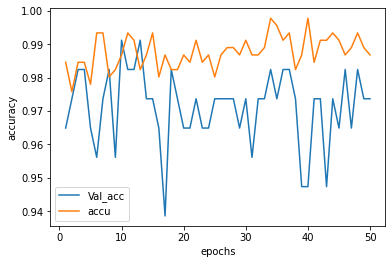

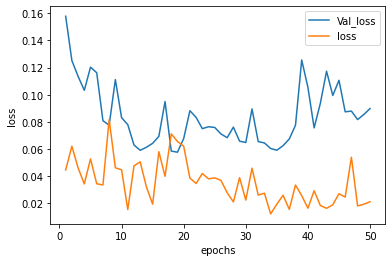

In [84]:
learning_curve(50,history)

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

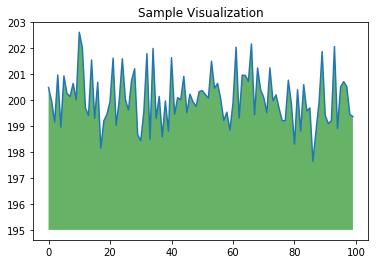

In [0]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [AI Hub](https://aihub.cloud.google.com/) project.

A few featured examples:

- [Neural Style Transfer](https://aihub.cloud.google.com/p/products%2F7f7495dd-6f66-4f8a-8c30-15f211ad6957): Use deep learning to transfer style between images.
- [EZ NSynth](https://aihub.cloud.google.com/p/products%2Fcddd17cf-5f86-4ce7-b6b6-03c5e52ee0fb): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://aihub.cloud.google.com/p/products%2F7a0acf15-0be0-41a6-9bdb-5a5abd4e8fbf): Classify fashion-related images with deep learning.
- [DeepDream](https://aihub.cloud.google.com/p/products%2Ff9e8fc11-ad0f-410a-bebe-2482066ce570): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://aihub.cloud.google.com/p/products%2Ff5e8dd20-6b34-44a0-bc45-6e345e36a4e7): Create a generative model of handwritten digits.